## Random Walk

### Random Walk Model

#### Example 1: Random Walk with Fixed Moves

 - Suppose price of a stock move up by 5 paisa with probability 0.5 or move down by 5 paisa with probability 0.5 every seconds.
 - If the price of the stock is Re 1/-; then what will be the price of the stock after 21600 seconds
 - The model $P_t=P_t−1±M_t$, where $M_t=5 a.s$

In [17]:
options(repr.plot.width=6, repr.plot.height=4)

In [2]:
set.seed(321)
n<-21600
P<-rep(NA,n)
P[1]<-100 ## Current price 100 paisa or Re 1/-

In [3]:
for(sec in 2:n){
  toss<-sample(c("H","T"),1,replace = TRUE,prob = c(0.5,0.5))
  if(toss=="H")P[sec]<-P[sec-1]+5
  if(toss=="T")P[sec]<-P[sec-1]-5
}

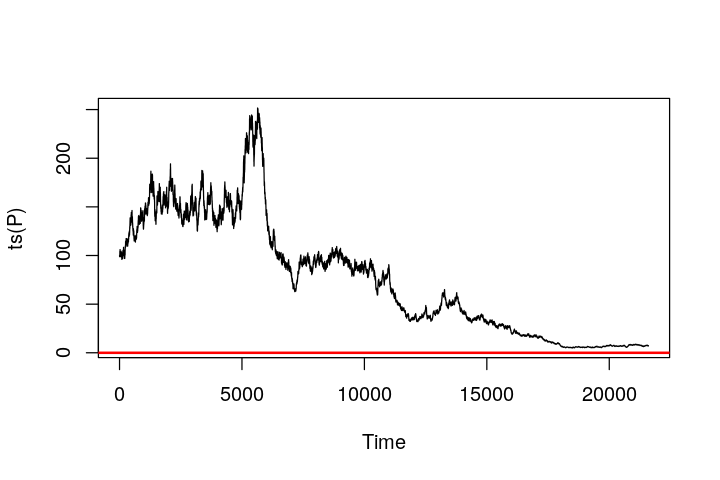

In [18]:
plot(ts(P))
abline(h=0,lwd=2,col="red")

#### Example 2: Random Walk with Random Moves

 - Suppose price of a stock move up or down with probability 0.5 or
 - Size of the movement follow $Poisson(λ=5)$
 - If the price of the stock is Re 1/-; then what will be the price of the stock after 21600 seconds
 - The model:
$$P_t=P_t−1+±M_t$$
where $M_t∼Poisson(λ=5)$

In [5]:
set.seed(321)
n<-21600
P<-M<-rep(NA,n)
P[1]<-100 ## Current price 100 paisa or Re 1/-

In [6]:
for(sec in 2:n){
  toss<-sample(c("H","T"),1,replace = TRUE,prob = c(0.5,0.5))
  M[sec]<-rpois(1,lambda = 5)
  if(toss=="H")P[sec]<-P[sec-1]+ M[sec]
  if(toss=="T")P[sec]<-P[sec-1]- M[sec]
}

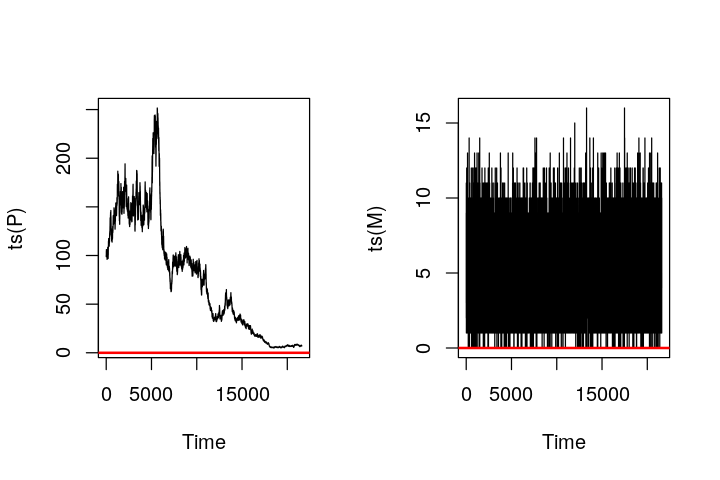

In [19]:
par(mfrow=c(1,2))
plot(ts(P))
abline(h=0,lwd=2,col="red")
plot(ts(M))
abline(h=0,lwd=2,col="red")

#### Example 3: Random Walk with Random Return

 - Simple return of an asset is nothing but movement of the price with respect to previous price.
\begin{eqnarray}
R_t&=&\frac{P_t-P_{t-1}}{P_{t-1}}\\
R_t.P_{t-1}&=&P_t-P_{t-1}\\
P_t&=&P_{t-1}(1+R_t)
\end{eqnarray}

 - Suppose $R_t∼N(\mu=0,\sigma=0.01)$ on every seconds.
 - If the price of the stock is Re 1/-; then what will be the price of the stock after 21600 seconds

In [8]:
set.seed(321)
n<-21600
P<-rep(NA,n)
P[1]<-100 ## Current price 100 paisa or Re 1/-

In [9]:
rt<-rnorm(n,mean=0,sd=0.01)
for(sec in 2:n) P[sec]<-P[sec-1]*(1+rt[sec])

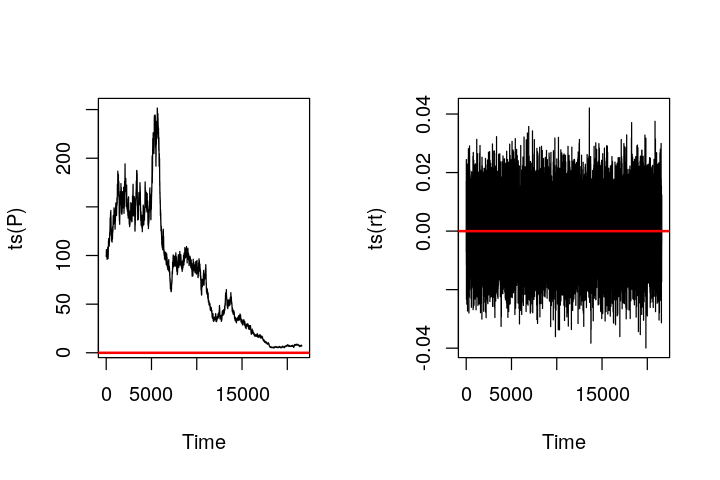

In [16]:
par(mfrow=c(1,2))
plot(ts(P))
abline(h=0,lwd=2,col="red")
plot(ts(rt))
abline(h=0,lwd=2,col="red")

#### Example 4: Random Walk with Random log-Return

 - The log-return of an asset indicates continuous compounding effect of the proce movement;
\begin{eqnarray*}
r_t &=& \log(P_t) - \log(P_{t-1})\\
&=& \log\Big(\frac{P_t}{P_{t-1}}\Big)\\
P_t &=& P_{t-1}e^{r_t}
\end{eqnarray*}
 - Suppose $r_t∼N(\mu=0,\sigma=0.01)$ on every seconds.
 - If the price of the stock is Re 1/-; then what will be the price of the stock after 21600 seconds

In [20]:
set.seed(321)
n<-21600
P<-rep(NA,n)
P[1]<-100 ## Current price 100 paisa or Re 1/-

In [21]:
rt<-rnorm(n,mean=0,sd=0.01)
for(sec in 2:n) P[sec]<-P[sec-1]*exp(rt[sec])

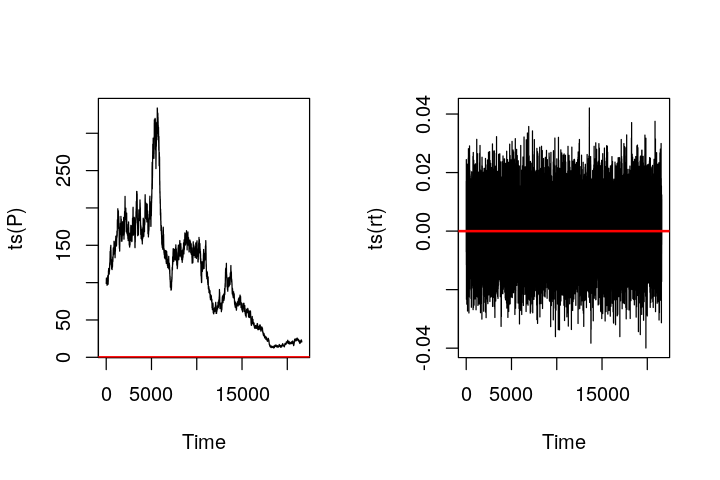

In [22]:
par(mfrow=c(1,2))
plot(ts(P))
abline(h=0,lwd=2,col="red")
plot(ts(rt))
abline(h=0,lwd=2,col="red")

### Simulate from stationary process

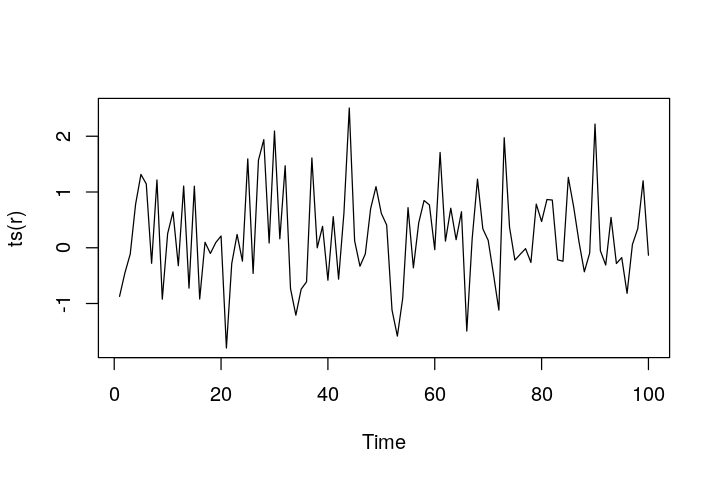

In [23]:
mu<-0
s<-1
n<-100
r<-rnorm(n,mu,s)
plot(ts(r))

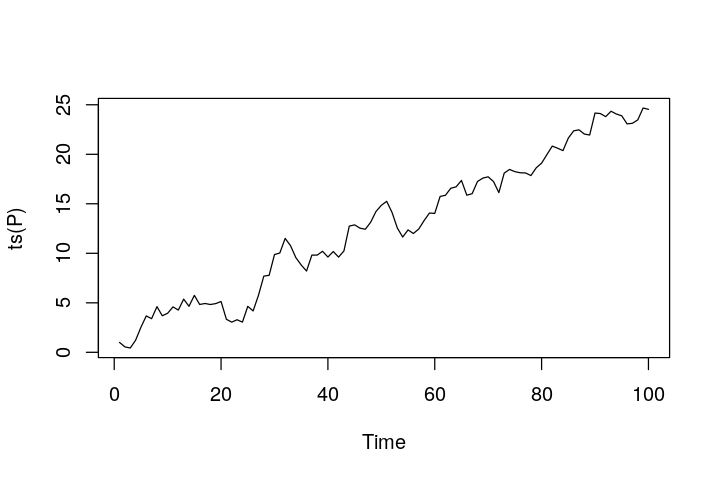

In [24]:
P<-r
P[1]<-1
P<-cumsum(P)
plot(ts(P))

### Dickey-Fuller test for Stationarity in a Time Series
 - The Dickey-Fuller test (1979) compares the null hypothesis
$$H_0:p_t=p_t−1+r_t$$
i.e., that the series is a random walk without drift, where $r_t$ is a white noise with mean 0 and variance $\sigma^2$

 - The alternative hypothesis is
$$H_1:p_t=\mu+\phi p_t−1+r_t$$
where $\mu$ and $\phi$ are constant with $|\phi|<1$
 - According to $H_1$, the process is stationary AR(1) with mean $\mu 1 − \phi$.

In [25]:
library(tseries)
head(EuStockMarkets)

Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 


DAX,SMI,CAC,FTSE
1628.75,1678.1,1772.8,2443.6
1613.63,1688.5,1750.5,2460.2
1606.51,1678.6,1718.0,2448.2
1621.04,1684.1,1708.1,2470.4
1618.16,1686.6,1723.1,2484.7
1610.61,1671.6,1714.3,2466.8


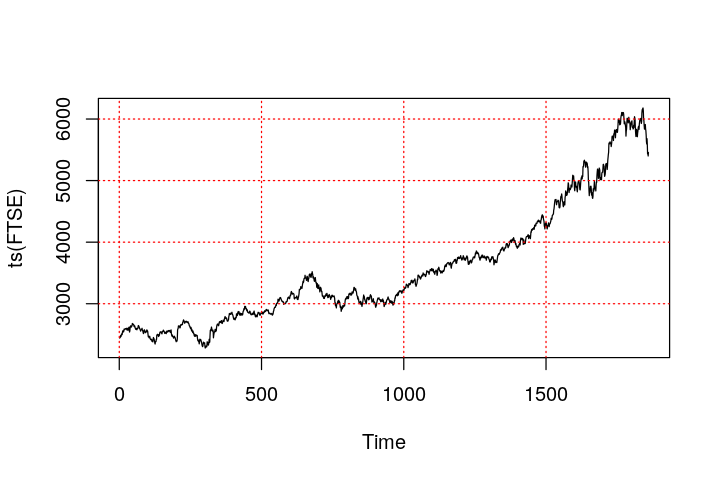

In [26]:
FTSE<-EuStockMarkets[,"FTSE"]
## Plot FTSE
n<-length(FTSE)
plot(ts(FTSE))
grid(col = "red")

#### Compute the log-return of the FTSE

In [27]:
log_return<-diff(log(FTSE))*100
n<-length(log_return)

#### The time-series plot of the log-return 


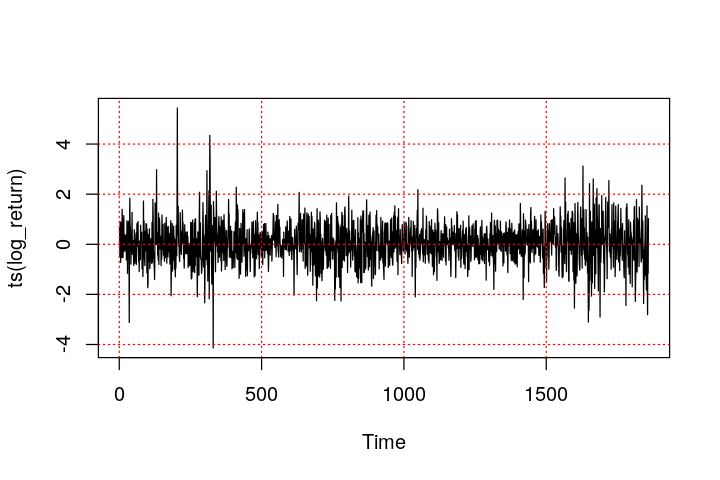

In [28]:
plot(ts(log_return))
grid(col="red")

#### Dickey-Fuller test for unit-root

In [29]:
## Step 1: Check if log-Price is non-stationary
adf.test(log(FTSE))


	Augmented Dickey-Fuller Test

data:  log(FTSE)
Dickey-Fuller = -2.4976, Lag order = 12, p-value = 0.3677
alternative hypothesis: stationary


In [30]:
## Step 3: Check if the log-returns are uncorrelated

Box.test(log_return,lag=10,type = "Ljung-Box")


	Box-Ljung test

data:  log_return
X-squared = 29.815, df = 10, p-value = 0.0009183


## Simulation of Geometric Brownian Motion

In [31]:
library(zoo)


Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric



In [33]:
FTSE<-EuStockMarkets[,"FTSE"]
Asset<-FTSE

In [34]:
## Simulation size
sim.size<-500
n<-length(Asset)

In [35]:
## log-return
rt<-diff(log(Asset))

In [36]:
rbar<-mean(rt)
s<-sd(rt)
delta_t<-1
mu_hat<-rbar+s^2/2

In [37]:
set.seed(321)

In [38]:
## Simulate log-return from Normal distribution
rt.sim<-rnorm(sim.size,mean=(mu_hat-s^2/2),sd=s)

In [39]:
Asset.sim<-rep(NA,sim.size)
Asset.sim[1]<-Asset[n]*exp(rt.sim[1])
for(i in 2:sim.size)Asset.sim[i]<-Asset.sim[i-1]*exp(rt.sim[i])

In [40]:
yl<-min(Asset)*0.85
yu<-max(Asset)*1.9

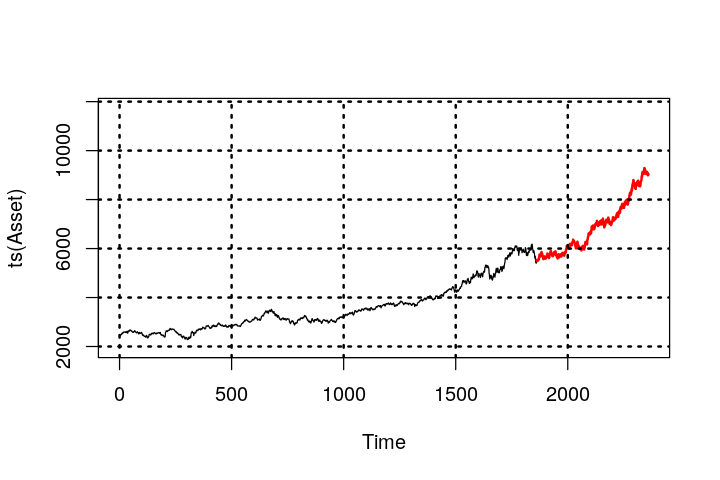

In [41]:
plot(ts(Asset),xlim=c(0,(n+sim.size)),ylim=c(yl,yu))
lines((n+1):(n+sim.size),Asset.sim,col="red",lwd=2)
grid(col="black",lwd=2)